In [1]:
import pandas as pd
import numpy as np

In [2]:
train_features = pd.read_csv('train-features.txt', sep=" ", header=None)
train_labels = pd.read_csv('train-labels.txt', sep=" ", header=None)
test_features = pd.read_csv('test-features.txt', sep=" ", header=None)
test_labels = pd.read_csv('test-labels.txt', sep=" ", header=None)

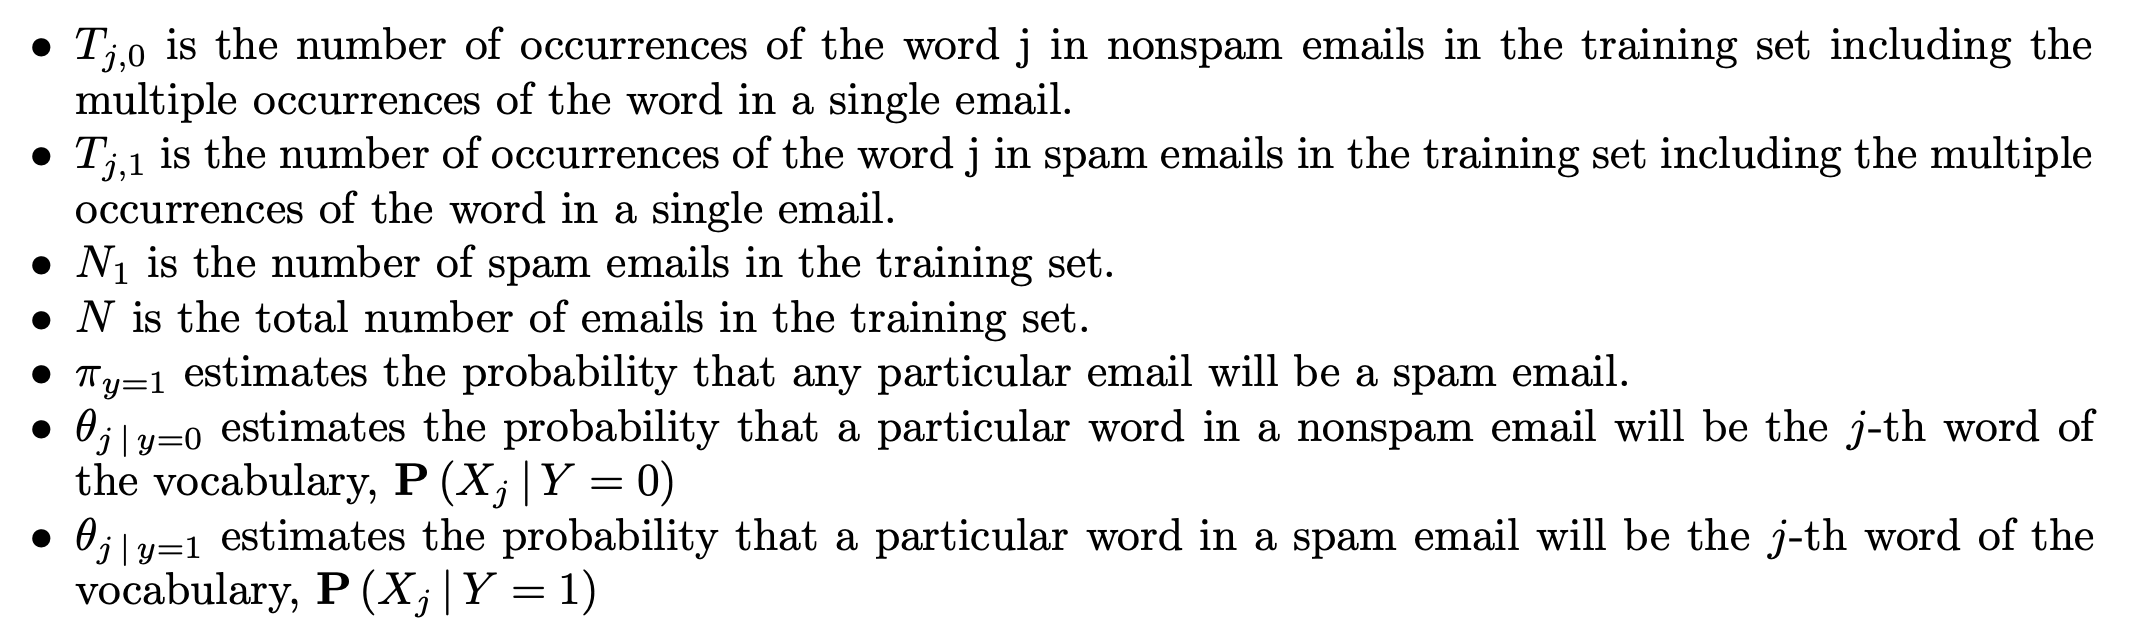

In [3]:
N0 = train_labels.value_counts().values[0]
N1 = train_labels.value_counts().values[1]
N = len(train_labels)
pi_y0 = train_labels.value_counts(normalize = True).values[0]
pi_y1 = train_labels.value_counts(normalize = True).values[1]

In [23]:
print('Number of non spam e-mails: ', N0)
print('Number of  spam e-mails: ', N1)
print('Priors for non spam e-mais and spam-emails are: ', pi_y0)


Number of non spam e-mails:  350
Number of  spam e-mails:  350
Priors for non spam e-mais and spam-emails are:  0.5


In [4]:
train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#MLE

non_spam_features = train_features[:N0]
spam_features = train_features[N0:]

T_j_0 = non_spam_features.sum().to_frame()
T_j_1 = spam_features.sum().to_frame()


In [6]:
non_spam_parameters = T_j_0 / non_spam_features.sum().sum()
spam_parameters = T_j_1 / spam_features.sum().sum()

In [7]:
def NaiveBayes(test_features, non_spam_parameters, spam_parameters, prior_spam):
    
    equal = 0 
    predictions = []
    prior_not_spam = 1 - prior_spam
    
    for i in range(0, len(test_features)):
        
        not_spam_result = prior_not_spam * (non_spam_parameters.T.pow(test_features.iloc[i,:], axis = 1).prod(axis = 1)[0])
        spam_result = prior_spam * (spam_parameters.T.pow(test_features.iloc[i,:], axis = 1).prod(axis = 1)[0])
        
        
        if not_spam_result > spam_result:
            predictions.append(0)
            
        elif spam_result > not_spam_result:
            predictions.append(1)
        
        else:
            equal += 1
            predictions.append(0)
            
    return predictions, equal
        
            
    
    

In [8]:
preds, equal_count = NaiveBayes(test_features, non_spam_parameters, spam_parameters, 0.5)


In [10]:
equal_count

260

In [9]:
def calculate_accuracy(preds, labels):
    
    return (preds == labels).sum() / len(labels)

In [11]:
labels = np.squeeze(test_labels.values)
preds = np.array(preds)
print('Naive Bayes Accuracy with MLE is: ', calculate_accuracy(preds,labels))

Naive Bayes Accuracy with MLE is:  0.5


In [14]:
#MAP
alpha = 1

In [15]:
non_spam_parameters_map = (T_j_0 + alpha) / (non_spam_features.sum().sum() + alpha * 2500)
spam_parameters_map = (T_j_1 + alpha) / (spam_features.sum().sum() + alpha * 2500)

In [25]:
def NaiveBayes_MAP(test_features, non_spam_parameters, spam_parameters, prior_spam, alpha = 1):
    
    predictions = []
    prior_not_spam = 1 - prior_spam
    vocab_size = 2500
    
    for i in range(0, len(test_features)):
        
        not_spam_result = np.log(prior_not_spam) + ((np.log(non_spam_parameters_map.T) * test_features.iloc[i,:]).sum().sum())
        spam_result = np.log(prior_spam) + ((np.log(spam_parameters_map.T) * test_features.iloc[i,:]).sum().sum())
        
        if spam_result / not_spam_result > 1:
                   
            predictions.append(0)
        
        else:
            predictions.append(1)
            
            
    return predictions
        
    

In [26]:
preds_map = NaiveBayes_MAP(test_features, non_spam_parameters, spam_parameters, 0.5)

In [20]:
labels = np.squeeze(test_labels.values)
preds_map = np.array(preds_map)
print('Naive Bayes Accuracy with MAP is: ', calculate_accuracy(preds_map,labels))

Naive Bayes Accuracy with MAP is:  0.9730769230769231
